In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gnlse

Gaussian envelope...


100%|██████████| 0.15/0.15 [00:07<00:00, 47.18s/m]  


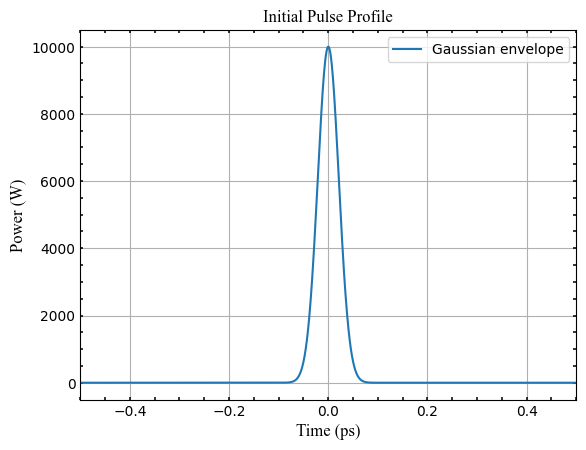

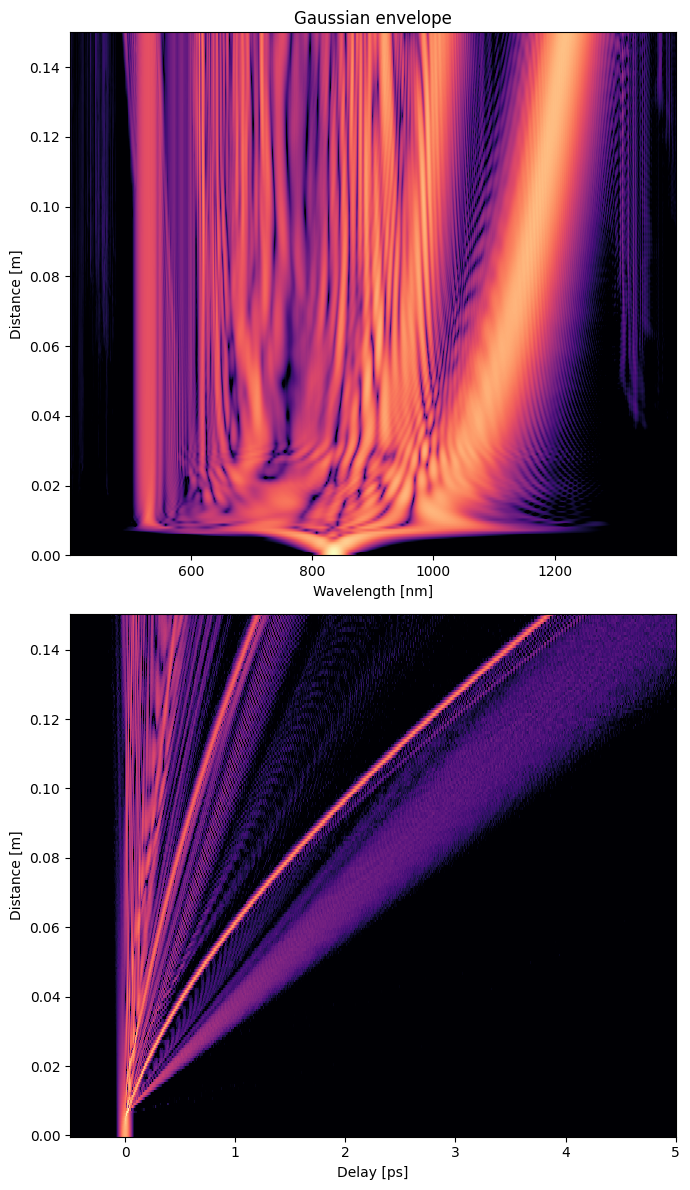

In [10]:
if __name__ == '__main__':
    setup = gnlse.GNLSESetup()

    # Numerical parameters
    setup.resolution = 2**14
    setup.time_window = 12.5  # ps
    setup.z_saves = 200

    # Physical parameters
    setup.wavelength = 835  # nm
    setup.fiber_length = 0.15  # m
    setup.nonlinearity = 0.11  # 1/W/m
    setup.raman_model = gnlse.raman_blowwood
    setup.self_steepening = True

    # The dispersion model is built from a Taylor expansion with coefficients
    # given below.
    loss = 0
    betas = np.array([
        -11.830e-3, 8.1038e-5, -9.5205e-8, 2.0737e-10, -5.3943e-13, 1.3486e-15,
        -2.5495e-18, 3.0524e-21, -1.7140e-24
    ])
    setup.dispersion_model = gnlse.DispersionFiberFromTaylor(loss, betas)

    # Input pulse parameters
    peak_power = 10000  # W
    duration = 0.050  # ps

    # This example extends the original code with additional simulations for
    pulse_models = [
        gnlse.GaussianEnvelope(peak_power, duration)
    ]
    
    # Plot initial pulse in time domain
    fig0 = plt.figure()
    ax0 = fig0.add_subplot()
    t = np.linspace(-setup.time_window/2, setup.time_window/2, setup.resolution)
    for pulse_model in pulse_models:
        field = pulse_model.A(t)
        intensity = np.abs(field)**2
        ax0.plot(t, intensity, label=pulse_model.name)
    
    ax0.set_xlabel('Time (ps)', fontsize=12, fontname='Times New Roman')
    ax0.set_ylabel('Power (W)', fontsize=12, fontname='Times New Roman')
    ax0.set_title('Initial Pulse Profile', fontsize=12, fontname='Times New Roman')
    ax0.grid(True)
    ax0.legend(loc='upper right')
    ax0.set_xlim([-0.5, 0.5])  # Zoom in to see pulse details
    ax0.grid(True)   
    ax0.minorticks_on()
    ax0.tick_params(
        axis='both', 
        which='both', 
        direction='in', 
        top=True,
        right=True,
        left=True,
        bottom=True,
        length=2.5,
        width=1.12
    )

    # Continue with existing propagation simulation
    count = len(pulse_models)
    plt.figure(figsize=(7,12), facecolor='w', edgecolor='k')
    for i, pulse_model in enumerate(pulse_models):
        print('%s...' % pulse_model.name)

        setup.pulse_model = pulse_model
        solver = gnlse.GNLSE(setup)
        solution = solver.run()

        plt.subplot(2, count, i + 1)
        plt.title(pulse_model.name)
        gnlse.plot_wavelength_vs_distance(solution, WL_range=[400, 1400])

        plt.subplot(2, count, i + 1 + count)
        gnlse.plot_delay_vs_distance(solution, time_range=[-0.5, 5])

    plt.tight_layout()
    plt.show()